In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import os

# os.chdir("C:/Users/FARIYA/Desktop")


In [2]:
dataset = pd.read_csv('All_Bus_Data_Clean.csv')
display(dataset)

,BusName,Busn,Dayn,S_Lat,S_Lng,E_Lat,E_Lng,S_Time_n,Speed,Distance,TravelTime(Min)
0,1,0,0,25.006991,67.076948,24.996667,67.077635,1,3.033,1.650,9.07
1,1,11,0,25.006991,67.076948,24.996667,67.077635,1,6.157,1.650,4.47
2,1,22,0,25.006991,67.076948,24.996667,67.077635,1,3.837,1.650,7.17
3,1,0,0,24.996667,67.077635,24.966255,67.079505,1,8.938,3.888,7.25
4,1,11,0,24.996667,67.077635,24.966255,67.079505,1,12.706,3.888,5.10
...,...,...,...,...,...,...,...,...,...,...,...
225645,4,73,3,24.906152,67.138835,24.907613,67.133777,4,2.792,1.036,6.18
225646,4,78,3,24.915087,67.129130,24.920318,67.134346,4,2.523,1.284,8.48
225647,4,76,3,24.906152,67.138835,24.907613,67.133777,4,1.634,1.036,10.57
225648,4,78,3,24.920318,67.134346,24.906152,67.138835,4,7.750,2.139,4.60


In [63]:
dataset.isnull().sum()

BusName            0
Busn               0
Dayn               0
S_Lat              0
S_Lng              0
E_Lat              0
E_Lng              0
S_Time_n           0
Speed              0
Distance           0
TravelTime(Min)    0
dtype: int64

In [2]:
# dataset=dataset[['Busn','Dayn','S_Lat','S_Lng','E_Lat','E_Lng','S_Time_n','Speed','Distance','Dwell_Time','TravelTime(Min)']]
# dataset=dataset.copy()

In [64]:
dataset_copied=dataset.copy()

In [4]:
dataset.head()

,BusName,Busn,Dayn,S_Lat,S_Lng,E_Lat,E_Lng,S_Time_n,Speed,Distance,TravelTime(Min)
0,1,0,0,25.006991,67.076948,24.996667,67.077635,1.0,3.033,1.650,9.07
1,1,11,0,25.006991,67.076948,24.996667,67.077635,1.0,6.157,1.650,4.47
2,1,22,0,25.006991,67.076948,24.996667,67.077635,1.0,3.837,1.650,7.17
3,1,0,0,24.996667,67.077635,24.966255,67.079505,1.0,8.938,3.888,7.25
4,1,11,0,24.996667,67.077635,24.966255,67.079505,1.0,12.706,3.888,5.10


In [16]:
dataset.dtypes

BusName              int64
Busn                 int64
Dayn                 int64
S_Lat              float64
S_Lng              float64
E_Lat              float64
E_Lng              float64
S_Time_n             int64
Speed              float64
Distance           float64
TravelTime(Min)    float64
dtype: object

In [65]:
dataset.shape

(225650, 11)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225650 entries, 0 to 225649
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BusName          225650 non-null  int64  
 1   Busn             225650 non-null  int64  
 2   Dayn             225650 non-null  int64  
 3   S_Lat            225650 non-null  float64
 4   S_Lng            225650 non-null  float64
 5   E_Lat            225650 non-null  float64
 6   E_Lng            225650 non-null  float64
 7   S_Time_n         225650 non-null  int64  
 8   Speed            225650 non-null  float64
 9   Distance         225650 non-null  float64
 10  TravelTime(Min)  225650 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 18.9 MB


In [27]:
dataset.dtypes

Busn            int64
Dayn            int64
S_Lat         float64
S_Lng         float64
E_Lat         float64
E_Lng         float64
S_Time_n        int64
Speed         float64
Distance      float64
Dwell_Time    float64
dtype: object

In [10]:
dataset.describe()

,Busn,Dayn,S_Lat,S_Lng,E_Lat,E_Lng,S_Time_n,Speed,Distance,Dwell_Time,TravelTime(Min)
count,47120.000000,47120.000000,47120.000000,47120.000000,47120.000000,47120.000000,47120.000000,47120.000000,47120.000000,47120.000000,47120.000000
mean,39.500000,2.870968,24.902227,67.041473,24.892296,67.036107,2.077356,5.307854,2.027211,4.979896,7.076470
std,23.092452,1.979626,0.048567,0.029427,0.045310,0.031679,0.807274,3.606146,1.125605,0.961688,2.158401
min,0.000000,0.000000,24.848784,66.997472,24.818317,66.974984,1.000000,1.468000,0.953000,3.330000,3.330000
25%,19.750000,1.000000,24.856809,67.010987,24.852795,67.004018,1.000000,3.082000,1.430000,4.150000,5.220000
50%,39.500000,3.000000,24.891666,67.043732,24.880616,67.040063,2.000000,4.206000,1.650000,4.970000,7.070000
75%,59.250000,5.000000,24.936822,67.075996,24.927333,67.064579,3.000000,6.289500,2.073000,5.820000,8.950000
max,79.000000,6.000000,25.006991,67.085698,24.996667,67.085698,4.000000,29.530000,5.906000,6.650000,10.820000


<AxesSubplot:>

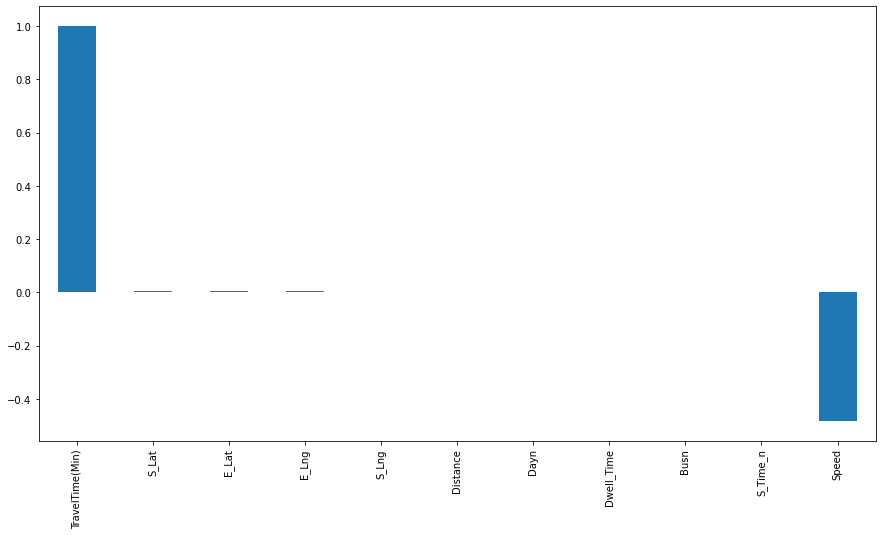

In [11]:
plt.figure(figsize=(15,8))
dataset.corr()['TravelTime(Min)'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:xlabel='Speed', ylabel='Distance'>

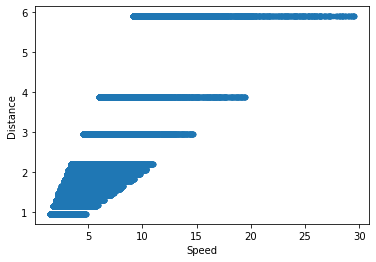

In [12]:
dataset[['Speed', 'Distance']].plot.scatter(x = 'Speed',y='Distance')

<AxesSubplot:xlabel='S_Time_n', ylabel='Distance'>

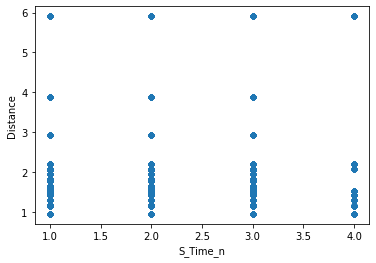

In [13]:
dataset[['S_Time_n', 'Distance']].plot.scatter(x = 'S_Time_n', y='Distance')

<AxesSubplot:xlabel='Dayn', ylabel='Speed'>

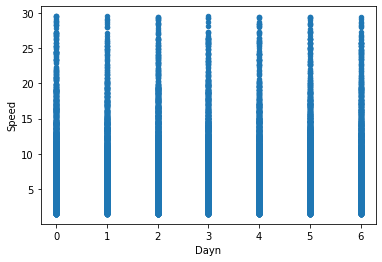

In [14]:
dataset[['Dayn', 'Speed']].plot.scatter(x = 'Dayn',y='Speed')

In [15]:
# dataset.drop(columns=['S_Time'],inplace=True)

In [3]:
y=dataset['TravelTime(Min)']

In [4]:
dataset.drop(columns=['TravelTime(Min)'],inplace=True)

In [5]:
X=dataset

In [6]:
# yaha pay splitt or scalling hoe hay

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
# xx=X_train.copy()
# xx

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(28, activation = 'relu', input_dim = 10)) # Adding input layer & 1st hidden layer

In [11]:
# model.add(Dense(units = 28, activation = 'relu')) 
# model.add(Dense(units = 28, activation = 'relu'))

In [12]:
#try1
model.add(Dense(units = 32, activation = 'relu')) 
model.add(Dense(units = 40, activation = 'relu'))
model.add(Dense(units = 28, activation = 'relu')) 
model.add(Dense(units = 18, activation = 'relu'))

In [13]:
#Try2
# model.add(Dense(units = 38, activation = 'relu'))
# model.add(Dense(units = 50, activation = 'relu'))
# model.add(Dense(units = 42, activation = 'relu'))
# model.add(Dense(units = 25, activation = 'relu'))

In [14]:
model.add(Dense(units = 1))

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
model.fit(X_train, y_train, batch_size = 10, epochs = 13)

Epoch 1/13
16924/16924 [==============================] - 40s 2ms/step - loss: 0.3118
Epoch 2/13
16924/16924 [==============================] - 31s 2ms/step - loss: 0.0115
Epoch 3/13
16924/16924 [==============================] - 24s 1ms/step - loss: 0.0075
Epoch 4/13
16924/16924 [==============================] - 24s 1ms/step - loss: 0.0057
Epoch 5/13
16924/16924 [==============================] - 24s 1ms/step - loss: 0.0044
Epoch 6/13
16924/16924 [==============================] - 24s 1ms/step - loss: 0.0040
Epoch 7/13
16924/16924 [==============================] - 26s 2ms/step - loss: 0.0037
Epoch 8/13
16924/16924 [==============================] - 28s 2ms/step - loss: 0.0031
Epoch 9/13
16924/16924 [==============================] - 28s 2ms/step - loss: 0.0028
Epoch 10/13
16924/16924 [==============================] - 27s 2ms/step - loss: 0.0027
Epoch 11/13
16924/16924 [==============================] - 27s 2ms/step - loss: 0.0025: 1s - l - ET
Epoch 12/13
16924/16924 [==============

In [13]:
y_pred = model.predict(X_test)

In [45]:
#_pred

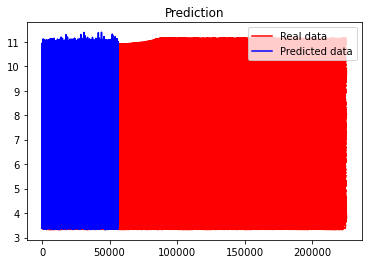

In [14]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 0.036786897802590424


In [16]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 0.0026113935759945095


In [17]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.051101796211038504


In [18]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [19]:
df

,Actual,Predicted
0,9.23,9.292729
1,7.02,7.073568
2,7.85,7.700450
3,4.07,4.066598
4,6.37,6.307727
...,...,...
56408,4.92,4.940010
56409,7.67,7.703735
56410,6.78,6.819014
56411,8.63,8.581503


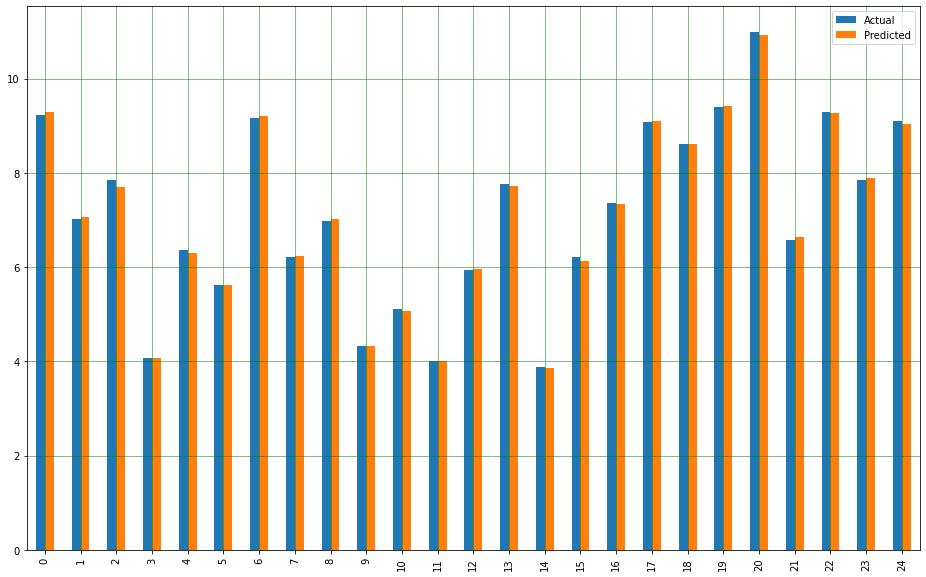

In [20]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Module validation using data

In [24]:
dataset

,BusName,Busn,Dayn,S_Lat,S_Lng,E_Lat,E_Lng,S_Time_n,Speed,Distance
0,1,0,0,25.006991,67.076948,24.996667,67.077635,1,3.033,1.650
1,1,11,0,25.006991,67.076948,24.996667,67.077635,1,6.157,1.650
2,1,22,0,25.006991,67.076948,24.996667,67.077635,1,3.837,1.650
3,1,0,0,24.996667,67.077635,24.966255,67.079505,1,8.938,3.888
4,1,11,0,24.996667,67.077635,24.966255,67.079505,1,12.706,3.888
...,...,...,...,...,...,...,...,...,...,...
225645,4,73,3,24.906152,67.138835,24.907613,67.133777,4,2.792,1.036
225646,4,78,3,24.915087,67.129130,24.920318,67.134346,4,2.523,1.284
225647,4,76,3,24.906152,67.138835,24.907613,67.133777,4,1.634,1.036
225648,4,78,3,24.920318,67.134346,24.906152,67.138835,4,7.750,2.139


In [25]:
# distance calculaton
import math
R = 6373.0

def distance_calculation(s_lat,s_lng,e_let,e_lng):
    lat1 = math.radians(s_lat) 
    lon1 = math.radians(s_lng)

    lat2= math.radians(e_let)  
    lon2=math.radians(e_lng)       

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    #Haversine_formula for distance
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return round(distance,3)+0.5

In [26]:

s_lat=24.886102
s_lng=67.041288

e_lat=24.9092084  #liaqutabad
e_lng=67.0482084
dist=distance_calculation(s_lat,s_lng,e_lat,e_lng)
print(dist)
# first to scale the data [Busn,Dayn,S_Lat,S_Lng,E_Lat,E_Lng,S_Time_n,Speed,Distance,Dwell_Time]
newdata=[[1,1,0,s_lat,s_lng,e_lat,e_lng,2,10.22,dist]]

new_data=sc.transform(newdata)
#print(new_data)
y_checking = model.predict(new_data)
y_checking

3.163


array([[5.1611814]], dtype=float32)

# Score check and also kfold

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9998811494546836

In [36]:
# from sklearn.model_selection import KFold
# folds=KFold(n_splits=10, random_state=10,shuffle=True)

# For model_load_Save

In [38]:
# for model saving and loading
model.save('D:/fyp/Pythoncode')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:/fyp/Pythoncode\assets


In [63]:
#model load
from tensorflow import keras
modell = keras.models.load_model('D:/fyp/Pythoncode')
#modell.predict(X_test)

In [8]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

In [11]:
s_lat=24.8683971
s_lng=66.91826

e_lat=24.8941353
e_lng=66.9895423
dist=distance_calculation(s_lat,s_lng,e_lat,e_lng)
print(dist)
# first to scale the data [BusName,Busn,Dayn,S_Lat,S_Lng,E_Lat,E_Lng,S_Time_n,Speed,Distance,Dwell_Time]
newdata=[[2,22,2,s_lat,s_lng,e_lat,e_lng,1,10.98,dist]]

new_data=sc.transform(newdata)
#print(new_data)
y_checking = modell.predict(new_data)
y_checking

8.242


array([[13.486217]], dtype=float32)

# Model Save and load using joblib

In [21]:
from joblib import dump, load
# dump(sc, 'D:/fyp/Pythoncode/std_scaler.joblib')

In [69]:
# filename='othermodel.sav'
# dump(model,filename)

In [64]:
std = load('D:/fyp/Pythoncode/std_scaler.joblib')


In [65]:
s_lat=24.8683971
s_lng=66.91826

e_lat=24.8941353
e_lng=66.9895423
dist=distance_calculation(s_lat,s_lng,e_lat,e_lng)
print(dist)
# first to scale the data [BusName,Busn,Dayn,S_Lat,S_Lng,E_Lat,E_Lng,S_Time_n,Speed,Distance,Dwell_Time]
newdata=[[2,22,2,s_lat,s_lng,e_lat,e_lng,1,10.98,dist]]

new_data=std.transform(newdata)
#print(new_data)
y_checking = modell.predict(new_data)
y_checking

8.242


array([[13.486217]], dtype=float32)

In [14]:
# filename = 'finalized_model.sav'
# dump(model, filename)

In [17]:
!python -V

Python 3.7.10


In [ ]:
filename = 'model.sav'
dump(model, open(filename, 'wb'))

In [18]:
!pip list

Package                  Version
------------------------ -------------------
absl-py                  0.12.0
aiohttp                  3.7.4
argon2-cffi              20.1.0
astunparse               1.6.3
async-generator          1.10
async-timeout            3.0.1
attrs                    20.3.0
backcall                 0.2.0
bleach                   3.3.0
blinker                  1.4
brotlipy                 0.7.0
cachetools               4.2.1
certifi                  2020.12.5
cffi                     1.14.5
chardet                  3.0.4
click                    7.1.2
colorama                 0.4.4
coverage                 5.5
cryptography             3.4.7
cycler                   0.10.0
Cython                   0.29.22
decorator                4.4.2
defusedxml               0.7.1
entrypoints              0.3
gast                     0.3.3
google-auth              1.28.0
google-auth-oauthlib     0.4.3
google-pasta             0.2.0
googleapis-common-protos 1.52.0
grpcio           

In [19]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')